<a href="https://colab.research.google.com/github/Matheusbcy/22-machine-learning-projects/blob/main/Basico/Wine_Quality_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Entendendo o dataset

📊 O dataset tem dados físico-químicos de vinhos (vermelhos e brancos) e uma nota de qualidade dada por provadores.

* Linhas: cada vinho
* Colunas: características químicas
* Variável alvo: quality (nota de 0 a 10)

## Plano de Análise Exploratória de Dados (EDA)

### 1. **Entendimento Básico dos Dados**

* **Variáveis Contínuas**
* **Variáveis Categórica/Ordinal(Alvo)**
* **Verificar Valore Ausentes**
* **Revisar a Distribuição de cada variável**

### 2. **Análise Univariada(Uma variável por vez)**
* **Histogramas e KDE(Kernel Density Estimate)**: Visualizar a distribuição de cada variável. Isso ajudará a identificar se são normalmente distribuídas, assimétricas, multimodais, etc.
* **Box Plots**: Identificar outliers e a dispersão dos dados.
* **Interpretação**: Olhar para mean vs median (50% quartil) para entender a assimetria. Se mean > median, é assimetria positiva (cauda para a direita). Se mean < median, é assimetria negativa (cauda para a esquerda). A std dará uma ideia da variabilidade.
* **Contagem de valores (variavel alvo) - Bar Plot**: Distribuição das diferentes categorias de qualidade (ex: quantos vinhos têm qualidade 5, quantos têm 6, etc.). Isso é crucial, pois pode haver um desequilíbrio significativo entre as classes.

### 3. **Análise Bivariada (duas variáveis por vez)**
#### **Relações entre variáveis dependentes e a variável alvo**

* **Box plots ou violin plots**: Para cada variável contínua, crie um box plot (ou violin plot) agrupado pela quality. Isso mostrará como a distribuição de cada atributo do vinho varia com os diferentes níveis de qualidade.
* **Mapa de calor da matriz de correlação**: Calcule a matriz de correlação de Pearson para todas as variáveis contínuas. Um mapa de calor é uma excelente forma de visualizar quais variáveis estão fortemente correlacionadas entre si.
* **Exemplo de correlação a procurar:**:
  1. Existe uma correlação positiva entre alcohol e quality?
  2. fixed acidity e pH são frequentemente inversamente correlacionados.
  3. free sulfur dioxide e total sulfur dioxide certamente terão alguma relação.

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='quality'>

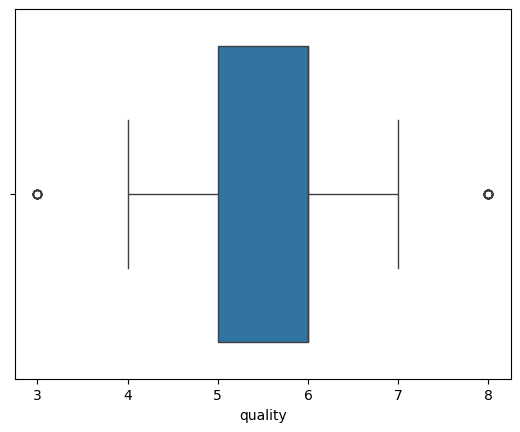

In [8]:
sns.boxplot(data = df, x = "quality")

## Histograma

Visualizar a distribuição de uma variável numérica.

In [9]:
num_cols = df.select_dtypes(include = "number").columns

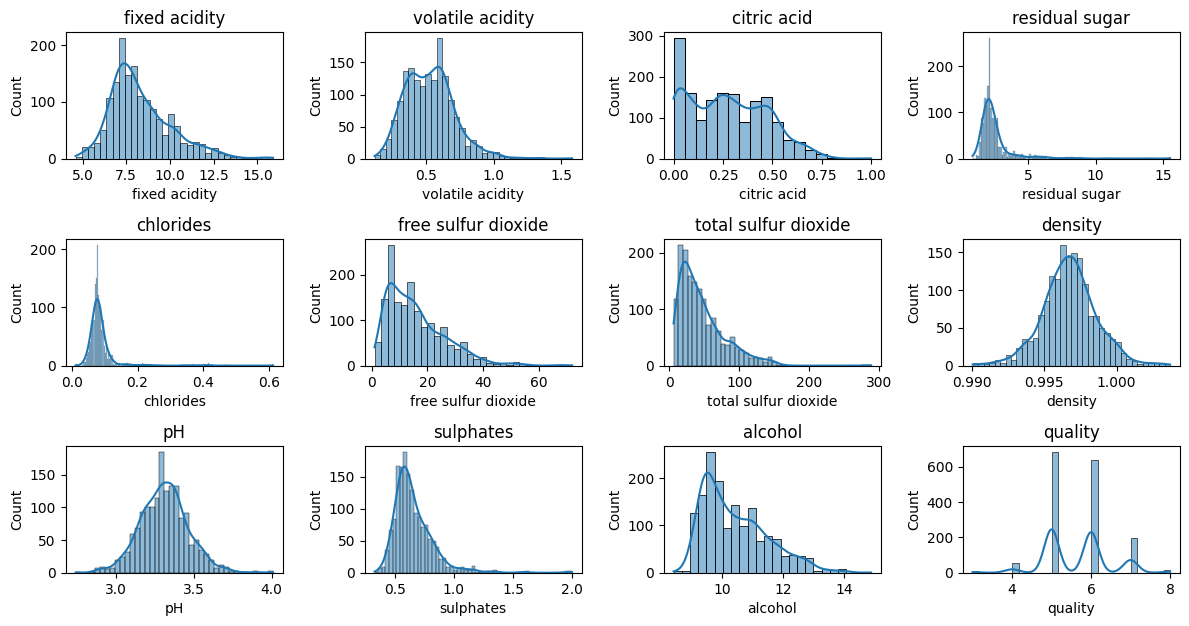

In [10]:
plt.figure(figsize = (12, 8))

for i, col in enumerate(num_cols, 1):
  plt.subplot(4, 4, i)
  sns.histplot(data = df, x = col, kde = True)
  plt.title(col)

plt.tight_layout()
plt.show()

### De acordo com o grafico:


---
🍷 1. Distribuição das variáveis

**density**, **pH** → distribuições próximas do normal (simétricas).

**residual sugar, chlorides, total sulfur dioxide** → assimétricas à direita (valores concentrados no início e cauda longa).

👉 Isso indica que talvez seja preciso normalizar ou aplicar log-transform antes de treinar um modelo.

---

📊 2. Identificação de outliers

* residual sugar
* total sulfur dioxide
* chlorides

mostram ***valores muito maiores que o resto dos dados*** → possíveis outliers.


---

🧠 3. Distribuição da variável-alvo (quality)

* **quality** é discreta e desbalanceada: a maioria dos vinhos está entre 5 e 6.

👉 Isso é muito importante se você for fazer classificação, pois:

O modelo pode ficar tendencioso para as classes majoritárias.

Pode ser necessário usar técnicas como **SMOTE, reweighting**, ou **amostragem estratificada.**



---

⚗️ 4. Relação com características físico-químicas

Variáveis como:

* **alcohol, volatile acidity, citric acid, sulphates**
têm distribuições que podem estar relacionadas com a qualidade do vinho.
Essas valem a pena investigar com gráficos de correlação ou boxplots por quality.


## Gráfico de Densidade: Um histograma "suavizado".

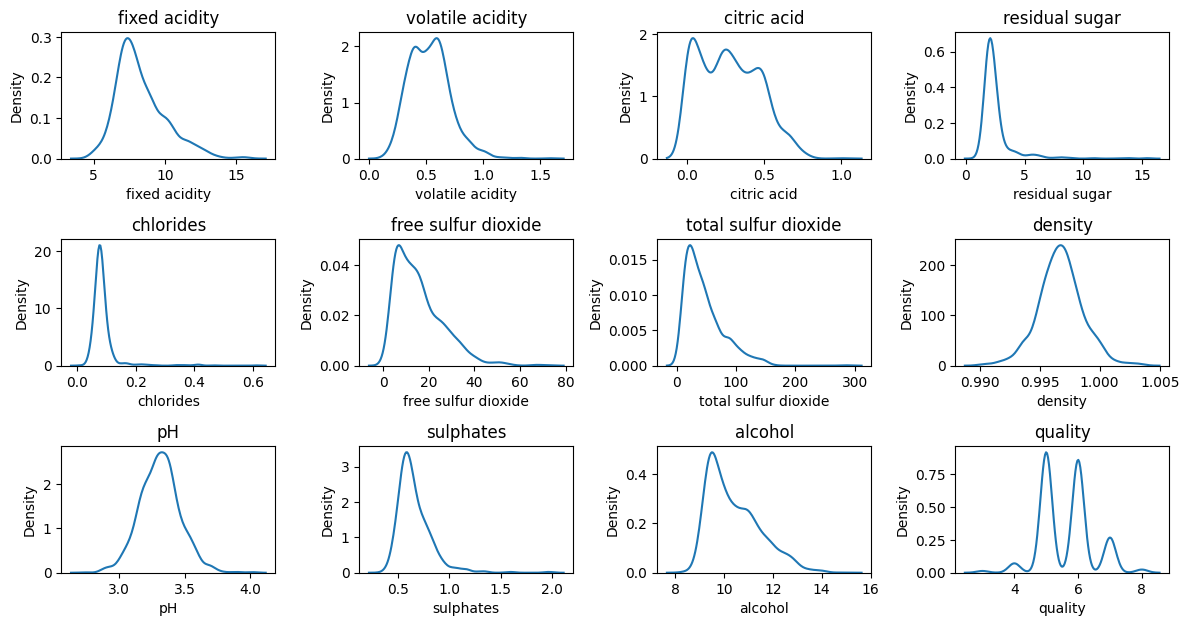

In [11]:
plt.figure(figsize = (12, 8))

for i, col in enumerate(num_cols, 1):
  plt.subplot(4, 4, i)
  sns.kdeplot(data = df, x = col)
  plt.title(col)

plt.tight_layout()
plt.show()

## Boxplot

É o detetive de outliers e dispersão.

Usando os dados do gráfico anterior deu para verificar quais colunas poderiam ter possiveis outliers

<Axes: xlabel='chlorides'>

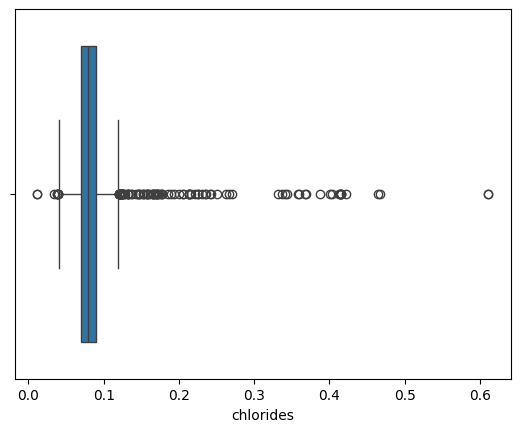

In [12]:
sns.boxplot(x = df["chlorides"])

<Axes: xlabel='sulphates'>

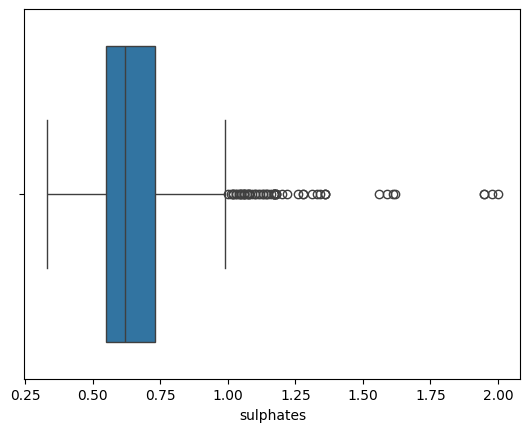

In [13]:
sns.boxplot(x = df["sulphates"])

<Axes: xlabel='total sulfur dioxide'>

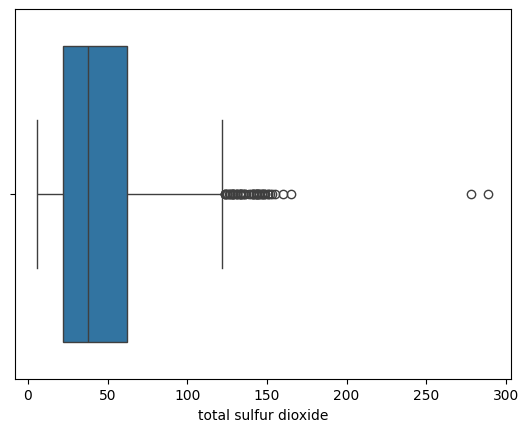

In [14]:
sns.boxplot(x = df["total sulfur dioxide"])

📊 1. Concentração dos dados

A caixa azul representa o intervalo entre o 1º quartil (Q1) e o 3º quartil (Q3) — ou seja, onde estão 50% dos valores centrais.

➡️ Nesse caso, dá pra ver que:

A maior parte dos valores de residual sugar está bem concentrada entre ~1,5 e ~3,5.

Isso indica uma distribuição fortemente assimétrica (com cauda longa à direita).

⚠️ 2. Outliers

Os círculos fora dos “bigodes” são outliers — valores considerados muito altos comparados à maioria.

➡️ Dá pra ver que há muitos outliers, indo até 15 ou 16 de açúcar residual.
Esses pontos são raros, mas podem influenciar a média e a performance de modelos sensíveis a valores extremos, como regressões lineares ou distâncias em KNN/K-Means.

# 2. Para Relacionar Duas Variáveis (Análise Bivariada)

### Gráfico de Dispersão (Scatter Plot): A ferramenta fundamental para esta relação.

<Axes: xlabel='density', ylabel='pH'>

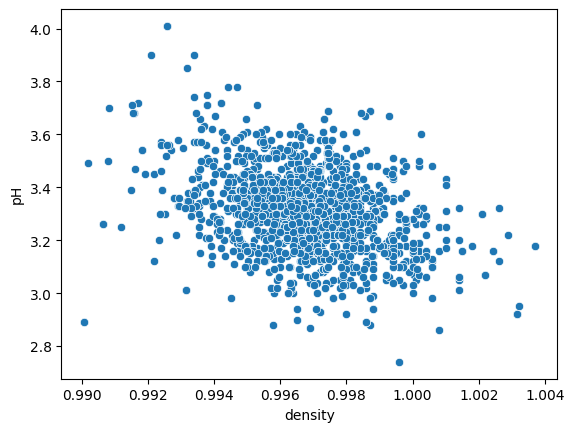

In [15]:
sns.scatterplot(data = df, x = "density", y="pH")

Esse gráfico de dispersão (scatterplot) mostra a relação entre as variáveis density (densidade) e pH — e dá pra tirar algumas informações bem úteis de interpretação química e estatística.

O gráfico mostra que os vinhos densos tendem a ser mais ácidos, temos uma correlação negativa fraca a moderada.

### Mapa de Calor de Correlação (Heatmap): Não é um gráfico de dados brutos, mas uma visualização da matriz de correlação.

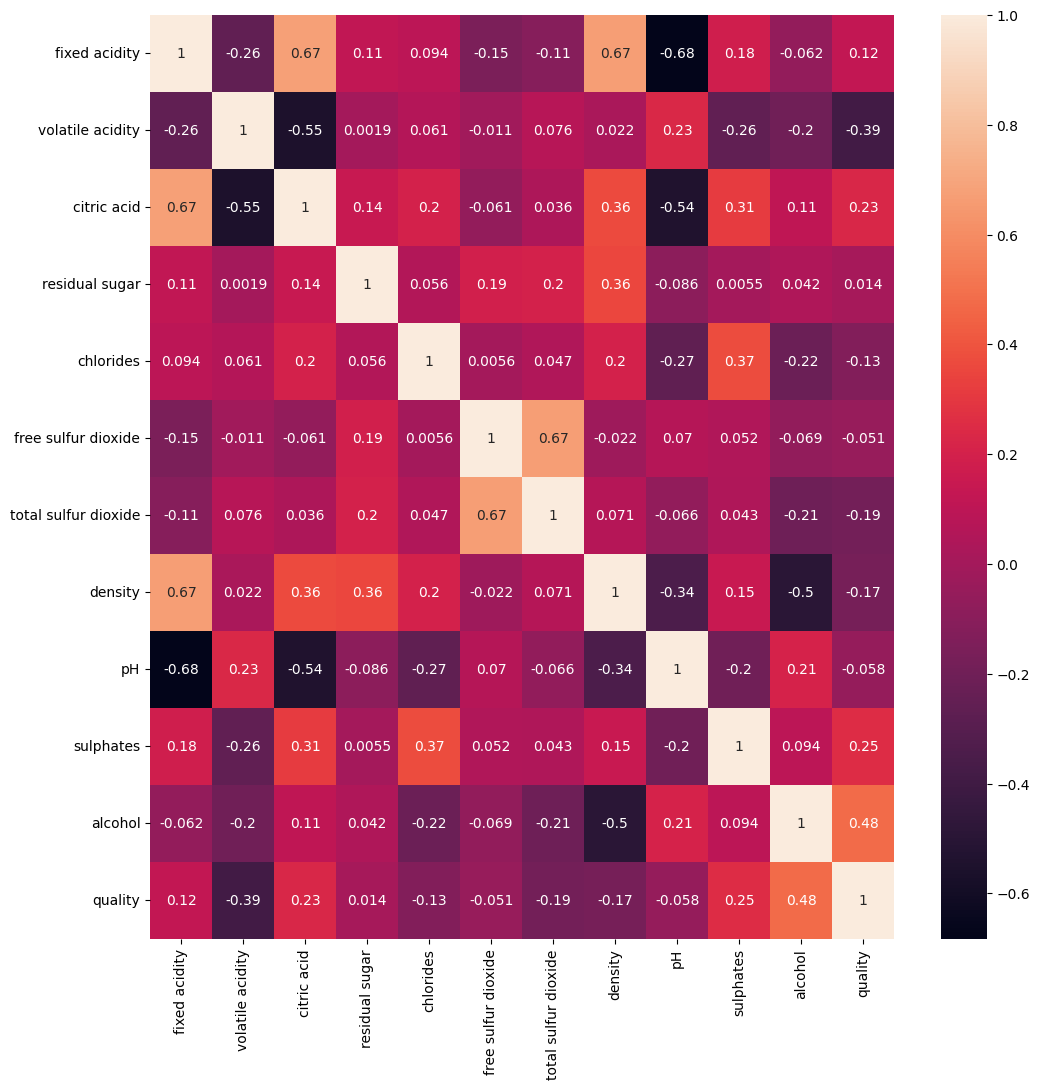

In [16]:
plt.figure(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True)
plt.show()

# 3. Para Dados com Muitas Variáveis (Análise Multivariada)

### Matriz de Dispersão (Scatter Plot Matrix)

**O que mostra:** Uma grade de gráficos de dispersão para todos os pares de variáveis numéricas em um conjunto.

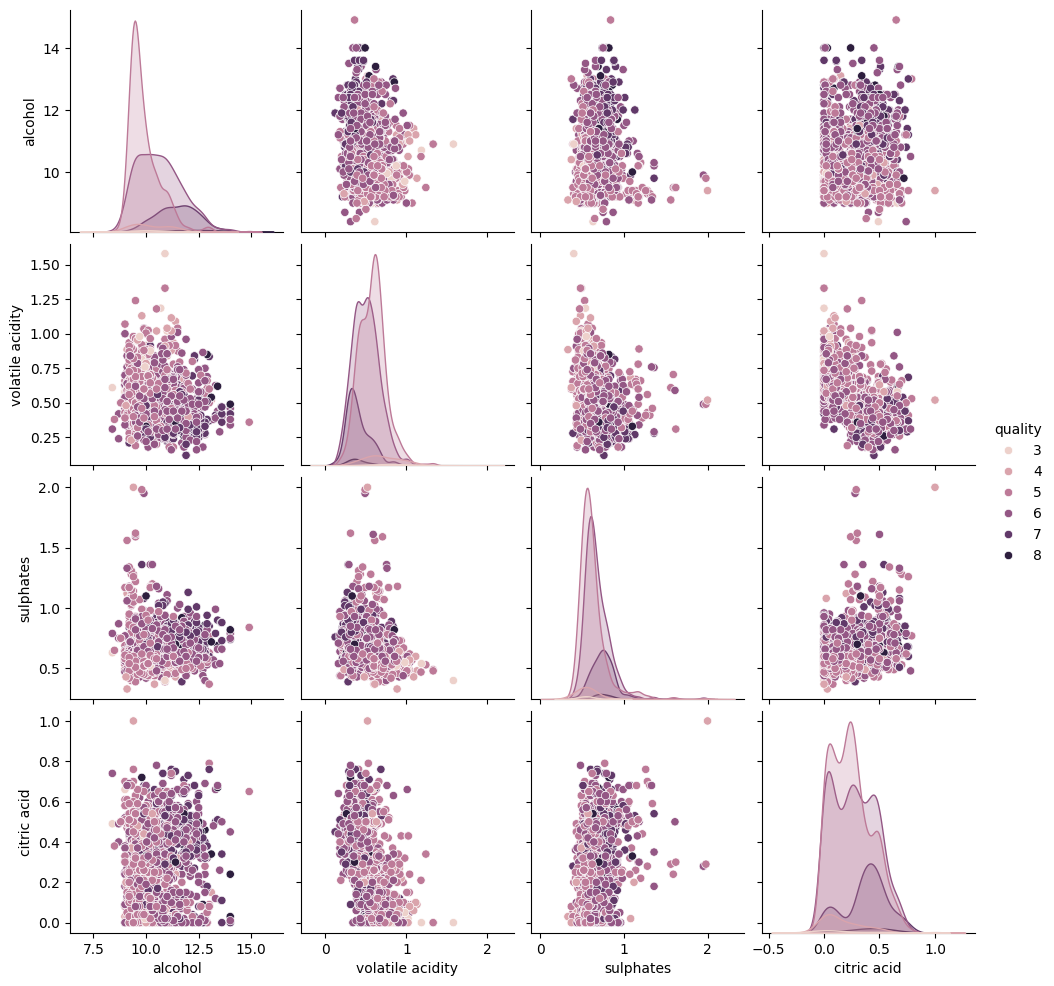

In [17]:
vars_importantes = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']
sns.pairplot(df[vars_importantes], hue='quality')

# EDA

In [18]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


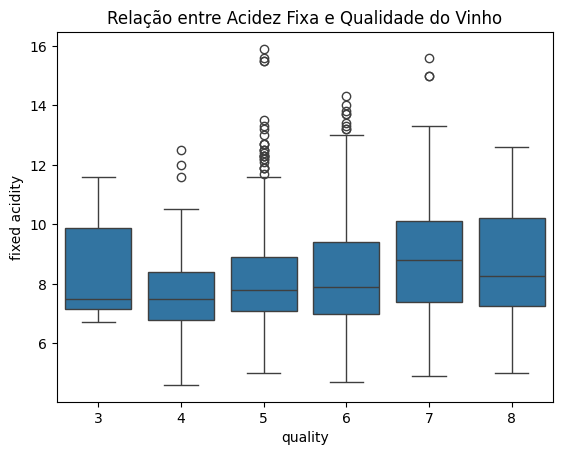

In [19]:
sns.boxplot(data = df, x = "quality", y = "fixed acidity")
plt.title('Relação entre Acidez Fixa e Qualidade do Vinho')
plt.show()

**1. "Vinhos de qualidade superior tendem a ter mais ou menos acidez fixa?"**  
**Resposta: Mais acidez fixa.**  
Pelo padrão visual do gráfico, mostram que conforme a qualidade aumenta (da esquerda para a direita), a altura das barras (fixed acidity) geralmente aumenta, indicando uma tendência positiva.

**2. "Existe uma faixa ideal de acidez para produzir vinhos bons?"**  
**Resposta: Sim, existe uma faixa ideal.**  
Os vinhos de qualidade mais alta (6, 7, 8) parecem estar associados a níveis médios de acidez fixa mais elevados. A faixa ideal parece estar nos níveis mais altos de acidez fixa mostrados no gráfico.

**3. "A acidez fixa é um bom indicador de qualidade?"**  
**Resposta: É um indicador moderado, mas não determinante.**  
Embora exista uma tendência positiva, as diferenças entre as categorias de qualidade não são extremamente pronunciadas. Isso sugere que:

* A acidez fixa influencia a qualidade

* Mas existem outros fatores importantes envolvidos

* Sozinha, não é suficiente para prever a qualidade com alta precisão

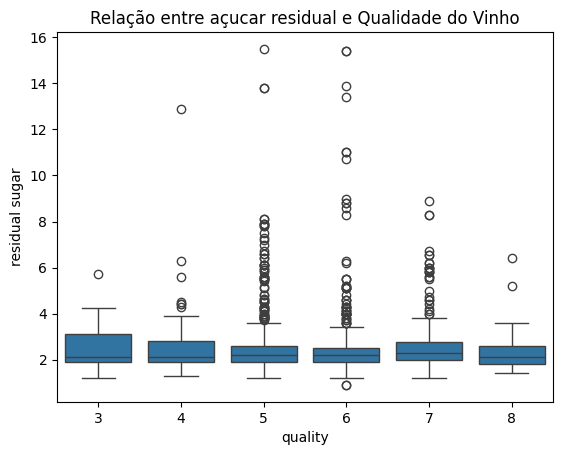

In [20]:
# açucar residual vs qualidade
sns.boxplot(data = df, x = "quality", y = "residual sugar")
plt.title('Relação entre açucar residual e Qualidade do Vinho')
plt.show()

**4. Insights sobre qualidade:**  
* Qualidades 3-4: Menos outliers, distribuição mais concentrada

* Qualidades 5-7: Muitos outliers, maior variabilidade

* Qualidade 8: Poucos dados (caixa pequena) mas também com outlier alto

**Conclusões importantes:**  
✅ A maioria dos vinhos tem baixo açúcar residual (2-4 g/L)

⚠️ Existem vinhos atípicos com muito açúcar (até 16+ g/L)

📊 Não há relação clara entre qualidade e açúcar residual nas medianas

🎯 Vinhos de alta qualidade (8) parecem ter menos variabilidade

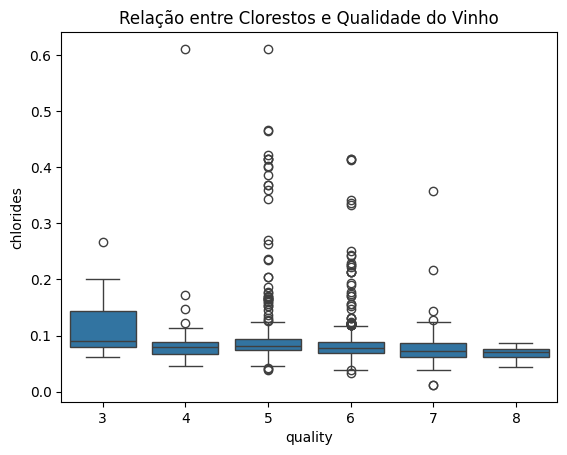

In [21]:
# Cloretos vs qualidade
sns.boxplot(data = df, x = "quality", y = "chlorides")
plt.title('Relação entre Clorestos e Qualidade do Vinho')
plt.show()

In [22]:
print("Estatísticas descritivas por qualidade:")
print(df.groupby('quality')['chlorides'].describe())

Estatísticas descritivas por qualidade:
         count      mean       std    min      25%     50%     75%    max
quality                                                                  
3         10.0  0.122500  0.066241  0.061  0.07900  0.0905  0.1430  0.267
4         53.0  0.090679  0.076192  0.045  0.06700  0.0800  0.0890  0.610
5        681.0  0.092736  0.053707  0.039  0.07400  0.0810  0.0940  0.611
6        638.0  0.084956  0.039563  0.034  0.06825  0.0780  0.0880  0.415
7        199.0  0.076588  0.029456  0.012  0.06200  0.0730  0.0870  0.358
8         18.0  0.068444  0.011678  0.044  0.06200  0.0705  0.0755  0.086


# Agrupando usando KMeans

**Insight: Vinhos de melhor qualidade têm MENOS sulfatos!**  

* Há uma tendência negativa clara (qualidade ↑, sulfatos ↓)

**Consistência e Qualidade**  
* Qualidade 8 tem o menor desvio padrão (0.0117) → mais consistentes

* Qualidades 3-5 têm maior variabilidade → menos padrão de qualidade

# **Possiveis perguntas e respostas**
1. Vinhos de qualidade superior tendem a ter mais ou menos sulfatos?  
**RESPOSTA:** MENOS sulfatos. Tendência negativa muito clara.

2. Existe uma faixa ideal de sulfatos para produzir vinhos bons?  
**RESPOSTA:** SIM, entre 0.068-0.077 g/L. Vinhos das categorias 7-8 se concentram nessa faixa.

3. Os sulfatos são um bom indicador de qualidade?  
**RESPOSTA:** EXCELENTE indicador!

* Relação consistente em todas as categorias

* Diferenças estatisticamente significativas

* Padrão claro: menos sulfatos = melhor qualidade

### 🔍 **Perguntas sobre Distribuição e Tendências Gerais**
#### 1. Qual é a distribuição da variável quality? Há desbalanceamento entre as classes?  
**RESPOSTA:**  Distribuição unimodal e assimétrica á esquerda (negativa), pois a media é maior que a mediana.
#### 2. Existe correlação entre teor alcoólico (alcohol) e qualidade (quality)?  
**RESPOSTA:** De acordo com o grafico de correlação o teor alcoólico e qualidade tem uma correlação de 0.48 não é uma correlação perfeita nem uma correlação fraca, porém quando um aumenta o outro tende a aumentar também, ou seja, vinhos com maior teor alcoólico tendem a receber avaliações de qualidade mais altas.  
#### 3. Como a acidez fixa (fixed acidity) e a acidez volátil (volatile acidity) se relacionam com a qualidade?  
**RESPOSTA:** Entre os componentes de acidez, a acidez volátil demonstra ser um fator crítico de degradação da qualidade (r = -0.39), enquanto a acidez fixa apresenta uma influência positiva marginal (r = 0.12). Isso sugere que controlar os ácidos voláteis é mais importante para a qualidade final do vinho do que ajustar a acidez fixa.
#### 4. Há outliers significativos em variáveis como chlorides, sulphates ou total sulfur dioxide?  
**RESPOSTA:**  
**Cloretos** - Valores de cloretos acima de 0.15-0.20 são considerados outliers, indicando vinhos com salinidade anormalmente alta, esses outliers podem representar vinhos com defeitos de fabricação ou contaminação.  
**Sulfatos** - Valores acima de 1.0 são outliers significativos, sulfatos muitos elevados podem indicar excesso de aditivos ou afetar negativamente a qualidade do vinho.  
**Total Sulfur Dioxido** - Está é a variável com mais outliers pronunciados, valores extremos de SO2 total podem indicar:
* Conservação excessiva do vinho
* Possiveis problemas de qualidade
* Vinhos com potencial para causar reações alérgicas

### 🧪 **Perguntas sobre Composição Química**
####1. O pH e a acidez fixa são inversamente correlacionados, como esperado?  
**RESPOSTA**: No gráfico de correlação foi identificado que existe uma correlação forte negativa, ou seja, quando a acidez fixa aumenta, o pH diminui, e vice-versa. O valor de -0.68 indica uma relação muito consistente e previsível.
####2. Como o açúcar residual (residual sugar) varia entre vinhos de diferentes qualidades?  
**RESPOSTA**:
####3. Vinhos com maior teor de sulfatos (sulphates) tendem a ter melhor qualidade?  
**RESPOSTA**:
####4. Qual é a relação entre dióxido de enxofre livre e total? Eles impactam a qualidade?  
**RESPOSTA**:

In [37]:
from scipy import stats

In [35]:
df['quality_category'] = pd.cut(df['quality'],
                               bins=[0, 4, 6, 10],
                               labels=['Baixa (3-4)', 'Média (5-6)', 'Alta (7-8)'])

print("Distribuição por categorias:")
print(df['quality_category'].value_counts())

Distribuição por categorias:
quality_category
Média (5-6)    1319
Alta (7-8)      217
Baixa (3-4)      63
Name: count, dtype: int64


In [38]:
# Filtrar vinhos de baixa e alta qualidade
baixa_qualidade = df[df['quality'].between(3, 4)]
alta_qualidade = df[df['quality'].between(7, 8)]

print(f"Vinhos de baixa qualidade: {len(baixa_qualidade)} amostras")
print(f"Vinhos de alta qualidade: {len(alta_qualidade)} amostras")

# Estatísticas descritivas comparativas
features = df.columns[:-2]  # Excluir quality e quality_category

print("\n=== ESTATÍSTICAS COMPARATIVAS ===")
for feature in features:
    print(f"\n--- {feature.upper()} ---")
    print(f"Baixa qualidade: Média = {baixa_qualidade[feature].mean():.3f}, DP = {baixa_qualidade[feature].std():.3f}")
    print(f"Alta qualidade:  Média = {alta_qualidade[feature].mean():.3f}, DP = {alta_qualidade[feature].std():.3f}")

    # Teste t para verificar diferenças significativas
    t_stat, p_value = stats.ttest_ind(baixa_qualidade[feature], alta_qualidade[feature])
    print(f"Teste t: p-value = {p_value:.6f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'}")

Vinhos de baixa qualidade: 63 amostras
Vinhos de alta qualidade: 217 amostras

=== ESTATÍSTICAS COMPARATIVAS ===

--- FIXED ACIDITY ---
Baixa qualidade: Média = 7.871, DP = 1.649
Alta qualidade:  Média = 8.847, DP = 2.000
Teste t: p-value = 0.000474 ***

--- VOLATILE ACIDITY ---
Baixa qualidade: Média = 0.724, DP = 0.248
Alta qualidade:  Média = 0.406, DP = 0.145
Teste t: p-value = 0.000000 ***

--- CITRIC ACID ---
Baixa qualidade: Média = 0.174, DP = 0.207
Alta qualidade:  Média = 0.376, DP = 0.194
Teste t: p-value = 0.000000 ***

--- RESIDUAL SUGAR ---
Baixa qualidade: Média = 2.685, DP = 1.724
Alta qualidade:  Média = 2.709, DP = 1.363
Teste t: p-value = 0.908718 ns

--- CHLORIDES ---
Baixa qualidade: Média = 0.096, DP = 0.075
Alta qualidade:  Média = 0.076, DP = 0.028
Teste t: p-value = 0.001605 **

--- FREE SULFUR DIOXIDE ---
Baixa qualidade: Média = 12.063, DP = 9.077
Alta qualidade:  Média = 13.982, DP = 10.235
Teste t: p-value = 0.180734 ns

--- TOTAL SULFUR DIOXIDE ---
Baixa q

###📊 Perguntas sobre Grupos ou Segmentação  

 #### 1. Há diferenças marcantes entre vinhos de baixa (ex.: 3–4) e alta qualidade (ex.: 7–8)?
 **RESPOSTA**: Baseado nos dados obtidos acima existe um perfil químico distinto que separa vinhos de baixa e alta qualidade. Vinhos de alta qualidade geralmente apresentam:

* Maior teor alcoólico

* Menos acidez volátil (menos "defeitos")

* Mais sulfatos (melhor preservação)

* Mais ácido cítrico (mais complexidade)

### 🧹 Perguntas sobre Qualidade dos Dados
#### 1. Existem valores missing ou duplicatas no conjunto completo?  
**RESPOSTA:** Sim, Existe alguns valores duplicados.
#### 2. A variável density está altamente correlacionada com outras variáveis (ex.: álcool, açúcar residual)?  
**RESPOSTA:** Density está altamente relacionado ao fixed acidity com uma correlação de 0.67 positivo, com residual sugar com uma correlação baixa de 0.37 e com o citric acid também com uma correlação baixa de 0.37 também existe uma correlação moderada inversa com alcohol, ou seja, qaudno density aumenta alcohol diminui.

In [46]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster_kmeans,quality_category
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0,Média (5-6)
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2,Média (5-6)
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0,Média (5-6)
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1,Média (5-6)
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0,Média (5-6)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0,Média (5-6)
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0,Média (5-6)
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0,Média (5-6)
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0,Média (5-6)


<Axes: xlabel='citric acid', ylabel='quality'>

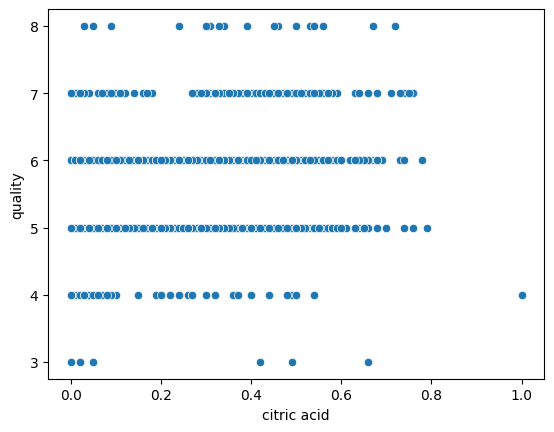

In [48]:
sns.scatterplot(x='citric acid', y='quality', data=df)

<Axes: xlabel='quality', ylabel='citric acid'>

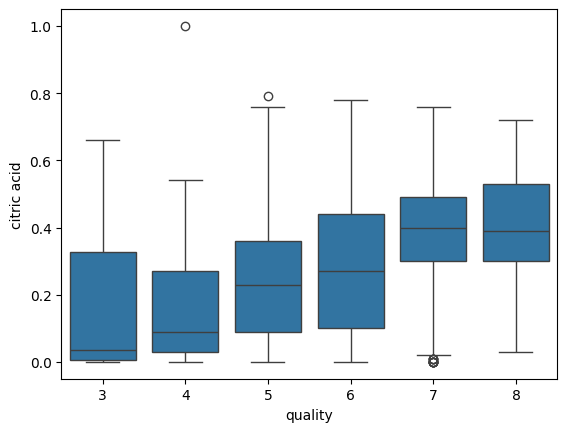

In [49]:
sns.boxplot(x='quality', y='citric acid', data=df)

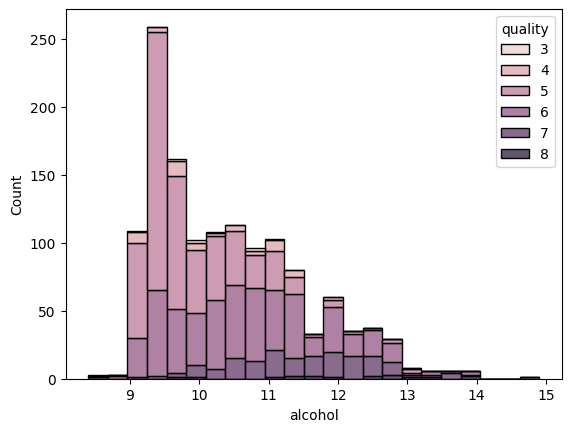

In [51]:
sns.histplot(data=df, x='alcohol', hue='quality', multiple='stack');

### 🍷 Perguntas Contextuais (Domínio de Vinho)
#### 1. Vinhos com maior acidez cítrica (citric acid) são melhor avaliados?  
**RESPOSTA:** A acidez cítrica é um fator discriminante - vinhos melhor avaliados realmente possuem maior concentração de ácido cítrico, que contribui para frescor, complexidade e equilíbrio no sabor.
#### 2. Há uma faixa ideal de álcool ou acidez volátil associada a vinhos de alta qualidade?  
**RESPOSTA:** Baseado no grafico, sim, existe uma faixa ideal de álcool associada a vinhos de alta qualidade: aproximadamente 11-13%, com o pico em torno de 11.5-12.5%.